In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C:/Users/Snigdha/Desktop/VSIP/train_sample.csv")

In [3]:
df.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,87540,12,1,13,497,07-11-2020 09:30,NaN,0
1,105560,25,1,17,259,07-11-2020 13:40,NaN,0
2,101424,12,1,19,212,07-11-2020 18:05,NaN,0
3,94584,13,1,13,477,07-11-2020 04:58,NaN,0
4,68413,12,1,1,178,09-11-2020 09:00,NaN,0


In [4]:
df['click_time'] = pd.to_datetime(df['click_time'])
df['attributed_time'] = pd.to_datetime(df['attributed_time'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   ip               100000 non-null  int64         
 1   app              100000 non-null  int64         
 2   device           100000 non-null  int64         
 3   os               100000 non-null  int64         
 4   channel          100000 non-null  int64         
 5   click_time       100000 non-null  datetime64[ns]
 6   attributed_time  227 non-null     datetime64[ns]
 7   is_attributed    100000 non-null  int64         
dtypes: datetime64[ns](2), int64(6)
memory usage: 6.1 MB


In [6]:
clicks = df.copy()
clicks['day'] = clicks['click_time'].dt.day.astype('uint8')
clicks['hour'] = clicks['click_time'].dt.hour.astype('uint8')
clicks['minute'] = clicks['click_time'].dt.minute.astype('uint8')

In [7]:
clicks.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,day,hour,minute
0,87540,12,1,13,497,2020-07-11 09:30:00,NaT,0,11,9,30
1,105560,25,1,17,259,2020-07-11 13:40:00,NaT,0,11,13,40
2,101424,12,1,19,212,2020-07-11 18:05:00,NaT,0,11,18,5
3,94584,13,1,13,477,2020-07-11 04:58:00,NaT,0,11,4,58
4,68413,12,1,1,178,2020-09-11 09:00:00,NaT,0,11,9,0


In [8]:
sum(df.duplicated(subset = list(df.columns)))

13

Calculating the number of duplicate entries in the dataset

In [9]:
df.drop_duplicates(subset = list(df.columns), keep = 'first', inplace=True)

Keeping the columns that first apprear on the dataset and deleting the proceeding duplicated columns from the dataset

In [10]:
df.ip.isnull().sum()

0

In [11]:
rows, columns = df.shape

In [12]:
print("Rows", rows)
print("Columns" , columns)

Rows 99987
Columns 8


There are 99987 rows and 8 columns present in the dataset

In [13]:
df.is_attributed.value_counts()

0    99760
1      227
Name: is_attributed, dtype: int64

### Data Exploration

#### Q1 From the dataset, identify which variables are highly correlate with each other and which variables are negatively correlated.

In [14]:
corrs = df.corr()
corrs

,ip,app,device,os,channel,is_attributed
ip,1.000000,0.010351,-0.001504,-0.000478,0.007549,0.054954
app,0.010351,1.000000,0.248492,0.247221,-0.028290,0.064458
device,-0.001504,0.248492,1.000000,0.924459,-0.035401,-0.000696
os,-0.000478,0.247221,0.924459,1.000000,-0.033178,0.006183
channel,0.007549,-0.028290,-0.035401,-0.033178,1.000000,-0.023339
is_attributed,0.054954,0.064458,-0.000696,0.006183,-0.023339,1.000000


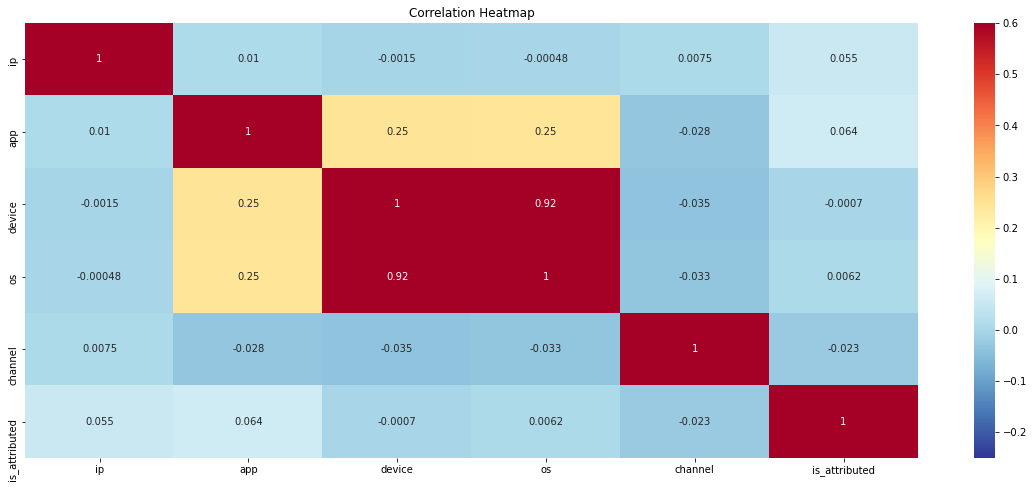

In [15]:
plt.figure(figsize = (20, 8))
sns.heatmap(corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

#### Q2 How many unique values are present in the dataset across all columns

C:\Users\Snigdha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


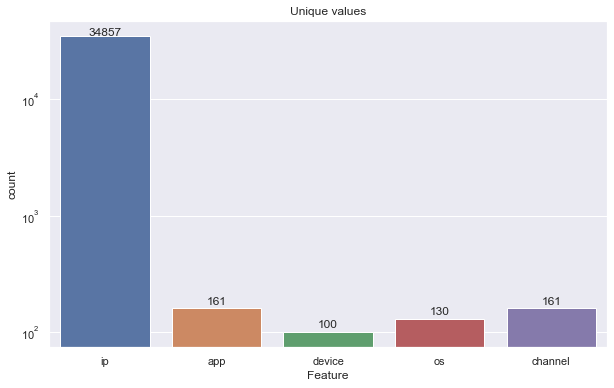

In [16]:
plt.figure(figsize=(10, 6))
cols = ['ip', 'app', 'device', 'os', 'channel']
x = [len(df[col].unique()) for col in cols]
sns.set(font_scale=1.0)
ax = sns.barplot(cols, x, log=True)
ax.set(xlabel='Feature', ylabel='count', title='Unique values')
for p, uniq in zip(ax.patches, x):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 10,uniq,ha="center") 

The above graph shows the count of the unique values in each of the column.

#### Q3 What percentage of the dataset did download the app. OR What percentage of websites were considered to be legit and customer did download the app on their device.  

In [17]:
mean = (df.is_attributed.values == 1).mean()

C:\Users\Snigdha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


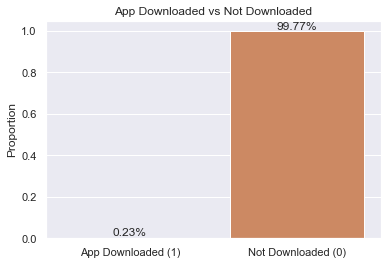

In [18]:
ax = sns.barplot(['App Downloaded (1)', 'Not Downloaded (0)'], [mean, 1-mean])
ax.set(ylabel='Proportion', title='App Downloaded vs Not Downloaded')
for p, uniq in zip(ax.patches, [mean, 1-mean]):
    ht = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,ht+0.01,'{}%'.format(round(uniq * 100, 2)),ha="center")

The above graph shows that the convertion rate is very low as 99.7% times the app is not downloaded

#### Q4 Which Ip address has the highest count in the dataset and is the count of Ip address related to the probability of app being downloaded? 

In [19]:
count = df['ip'].value_counts().reset_index(name='counts')
count.columns = ['ip', 'counts']

In [20]:
count.head()

,ip,counts
0,5348,669
1,5314,616
2,73487,438
3,73516,398
4,53454,280


Depicts the count against each IP address (Top 5)

In [21]:
df= df.merge(count, on='ip', how='left')

In [22]:
df[df['is_attributed']==1].sort_values('counts', ascending=False)[:10]

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,counts
11679,5348,29,1,19,343,2020-07-11 23:07:00,2020-07-11 23:07:00,1,669
15820,5348,19,0,29,213,2020-07-11 14:17:00,2020-07-11 14:17:00,1,669
30072,5348,19,40,24,213,2020-09-11 10:47:00,2020-09-11 10:47:00,1,669
88094,5314,83,0,21,171,2020-06-11 23:07:00,2020-06-11 23:16:00,1,616
47461,5314,18,1,19,107,2020-08-11 12:23:00,2020-08-11 12:23:00,1,616
78390,5314,10,1,1,113,2020-07-11 23:21:00,2020-08-11 00:01:00,1,616
64671,111025,10,1,19,377,2020-07-11 13:45:00,2020-07-11 13:46:00,1,137
22432,44067,19,0,38,213,2020-09-11 11:41:00,2020-09-11 11:42:00,1,70
80066,5729,19,0,0,347,2020-07-11 07:33:00,2020-07-11 07:35:00,1,42
9276,118252,19,957,59,213,2020-07-11 13:19:00,2020-07-11 13:22:00,1,41


This shows that IP addresses with a high count have a tendency to getting converted. This could also mean that IP which have a high count are legit and are not produced by bot servers

#### Q5 During the day, what time was the greatest number of clicks on an advertisement observed for downloading the app? 

<Figure size 720x432 with 0 Axes>

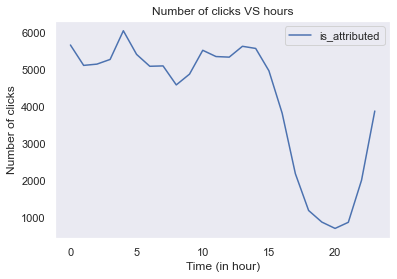

In [23]:
plt.figure(figsize=(10, 6))
clicks[['hour', 'is_attributed']].groupby(['hour'],as_index=True).count().plot()
plt.ylabel("Number of clicks")
plt.xlabel("Time (in hour)")
plt.title("Number of clicks VS hours")
plt.grid()

#### Q6 What is the conversion ratio of the app being downloaded through the day based on the hour of click taking place. Also compare the graph of number of clicks vs hour with conversion ratio vs hour 

<Figure size 720x432 with 0 Axes>

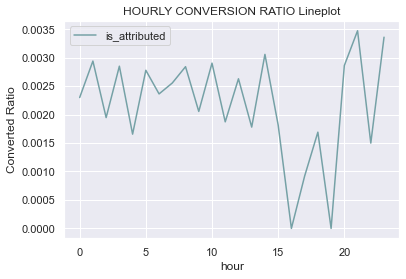

In [24]:
plt.figure(figsize=(10, 6))
clicks[['hour','is_attributed']].groupby(['hour'], as_index=True).mean().plot( color='#75a1a6')
plt.title('HOURLY CONVERSION RATIO Lineplot');
plt.ylabel('Converted Ratio');

<Figure size 720x432 with 0 Axes>

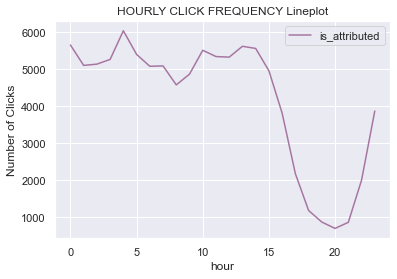

In [25]:
plt.figure(figsize=(10, 6))
clicks[['hour','is_attributed']].groupby(['hour'], as_index=True).count().plot(color='#a675a1')
plt.title('HOURLY CLICK FREQUENCY Lineplot');
plt.ylabel('Number of Clicks');

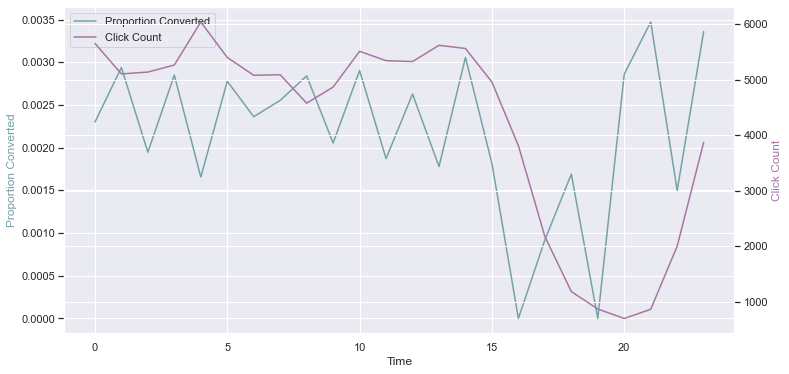

In [26]:
group = clicks[['hour','is_attributed']].groupby(['hour'], as_index=False).mean()
x = group['hour']
ymean = group['is_attributed']
group = clicks[['hour','is_attributed']].groupby(['hour'], as_index=False).count()
ycount = group['is_attributed']


fig = plt.figure(figsize=(12,6))
host = fig.add_subplot(111)

par1 = host.twinx()

host.set_xlabel("Time")
host.set_ylabel("Proportion Converted")
par1.set_ylabel("Click Count")

#color1 = plt.cm.viridis(0)
#color2 = plt.cm.viridis(0.5)
color1 = '#75a1a6'
color2 = '#a675a1'

p1, = host.plot(x, ymean, color=color1,label="Proportion Converted")
p2, = par1.plot(x, ycount, color=color2, label="Click Count")

lns = [p1, p2]
host.legend(handles=lns, loc='best')

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())

#plt.savefig("pyplot_multiple_y-axis.png", bbox_inches='tight')

#### Q7 What is the download proportion for the highest count of click per app? 

In [27]:
new= df[['app', 'is_attributed']].groupby('app', as_index=False).mean().sort_values('is_attributed', ascending=False)
new_counts = df[['app', 'is_attributed']].groupby('app', as_index=False).count().sort_values('is_attributed', ascending=False)

In [28]:
new

,app,is_attributed
98,115,1.0
99,116,1.0
85,96,1.0
112,145,1.0
64,71,1.0
...,...,...
60,66,0.0
59,65,0.0
58,64,0.0
56,61,0.0


In [29]:
new_counts

,app,is_attributed
2,3,18278
11,12,13193
1,2,11733
8,9,8992
14,15,8595
...,...,...
123,168,1
125,171,1
129,190,1
130,192,1


In [30]:
merge = new_counts.merge(new, on='app', how='left')
merge.columns = ['app', 'click_count', 'download_prop']

In [31]:
merge

,app,click_count,download_prop
0,3,18278,0.000219
1,12,13193,0.000076
2,2,11733,0.000000
3,9,8992,0.000890
4,15,8595,0.000233
...,...,...,...
156,168,1,0.000000
157,171,1,0.000000
158,190,1,0.000000
159,192,1,0.000000


In [32]:
prop = df[['app', 'is_attributed']].groupby('app', as_index=False).mean().sort_values('is_attributed', ascending=False)
counts = df[['app', 'is_attributed']].groupby('app', as_index=False).count().sort_values('is_attributed', ascending=False)


In [33]:
merge = counts.merge(prop, on='app', how='left')
merge.columns = ['app', 'count of click', 'downloaded_prop']

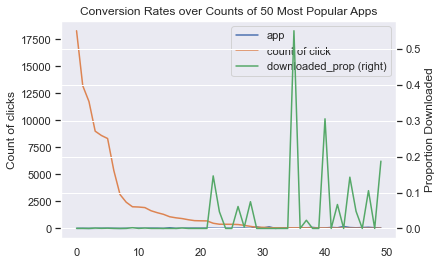

In [34]:
ax = merge[:50].plot(secondary_y='downloaded_prop')
plt.title('Conversion Rates over Counts of 50 Most Popular Apps')
ax.set(ylabel='Count of clicks')
plt.ylabel('Proportion Downloaded')
plt.show()

In [35]:
print('Counversion Rates over Counts of top 10 Popular Apps')
print(merge[:10])

Counversion Rates over Counts of top 10 Popular Apps
   app  count of click  downloaded_prop
0    3           18278         0.000219
1   12           13193         0.000076
2    2           11733         0.000000
3    9            8992         0.000890
4   15            8595         0.000233
5   18            8314         0.000601
6   14            5359         0.000000
7    1            3135         0.000000
8   13            2422         0.000000
9    8            2003         0.001997


#### Q8 How much time did the customer take after clicking on the advertisement and downloading the app? 

In [36]:
clicks['Time_diff']= clicks['attributed_time']-clicks['click_time']
#check:
clicks[clicks['is_attributed']==1][:15]

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,day,hour,minute,Time_diff
284,224120,19,0,29,213,2020-08-11 02:22:00,2020-08-11 02:22:00,1,11,2,22,0 days 00:00:00
481,272894,10,1,7,113,2020-08-11 06:10:00,2020-08-11 06:10:00,1,11,6,10,0 days 00:00:00
1208,79001,19,0,0,213,2020-07-11 09:54:00,2020-07-11 11:59:00,1,11,9,54,0 days 02:05:00
1341,131029,19,0,0,343,2020-09-11 10:58:00,2020-09-11 11:52:00,1,11,10,58,0 days 00:54:00
1412,40352,19,0,0,213,2020-07-11 22:19:00,2020-08-11 01:55:00,1,11,22,19,30 days 03:36:00
1666,48733,35,1,18,274,2020-07-11 12:25:00,2020-07-11 13:10:00,1,11,12,25,0 days 00:45:00
1771,330861,35,1,22,21,2020-08-11 18:54:00,2020-08-11 22:39:00,1,11,18,54,0 days 03:45:00
1917,309576,5,1,32,113,2020-09-11 08:47:00,2020-09-11 08:47:00,1,11,8,47,0 days 00:00:00
3914,220571,71,1,25,3,2020-08-11 04:35:00,2020-08-11 04:37:00,1,11,4,35,0 days 00:02:00
3992,240051,35,1,19,21,2020-08-11 08:07:00,2020-08-11 09:46:00,1,11,8,7,0 days 01:39:00


In [37]:
clicks['Time_diff'].describe()

count                          227
mean     1 days 14:53:17.973568281
std      6 days 16:54:23.088327342
min                0 days 00:00:00
25%                0 days 00:01:00
50%                0 days 00:03:00
75%                0 days 01:28:00
max               30 days 12:52:00
Name: Time_diff, dtype: object

#### Q9 Identify the top 20 OS where the click and download and identify the trend if any

C:\Users\Snigdha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Count')

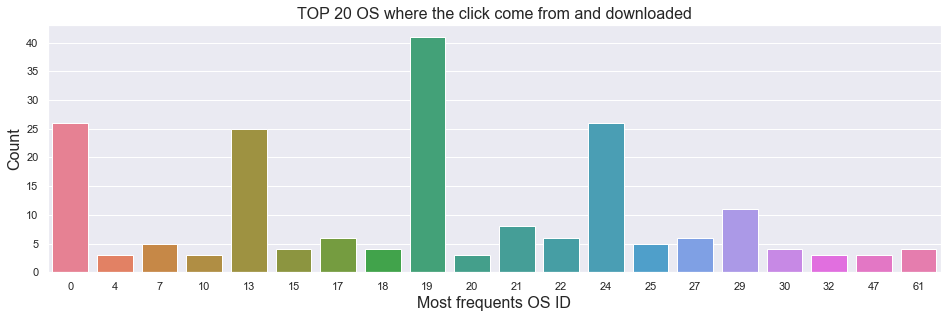

In [38]:
app_frequency_downloaded = df[df['is_attributed'] == 1]['os'].value_counts()[:20]
app_frequency_click = df[df['is_attributed'] == 0]['os'].value_counts()[:20]

plt.figure(figsize=(16,10))
plt.subplot(2,1,1)
g = sns.barplot(app_frequency_downloaded.index, app_frequency_downloaded.values,
                palette='husl')
g.set_title("TOP 20 OS where the click come from and downloaded",fontsize=16)
g.set_xlabel('Most frequents OS ID',fontsize=16)
g.set_ylabel('Count',fontsize=16)

### Data Modelling

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

In [40]:
x=df[['ip', 'app','device','os','channel']]
y=df['is_attributed']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
  
# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (69990, 5)
Number transactions y_train dataset:  (69990,)
Number transactions X_test dataset:  (29997, 5)
Number transactions y_test dataset:  (29997,)


In [42]:
from sklearn.preprocessing import MinMaxScaler
mms_xtrain = MinMaxScaler().fit_transform(X_train)
mms_xtest = MinMaxScaler().fit_transform(X_test)

In [43]:
# logistic regression object
lr = LogisticRegression()
  
# train the model on train set
lr.fit(X_train, y_train.ravel())
  
predictions = lr.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29920
           1       0.00      0.00      0.00        77

    accuracy                           1.00     29997
   macro avg       0.50      0.50      0.50     29997
weighted avg       0.99      1.00      1.00     29997



In [44]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 

Before OverSampling, counts of label '1': 150
Before OverSampling, counts of label '0': 69840 



### SMOTE Technique 

In [45]:
df.is_attributed.value_counts()

0    99760
1      227
Name: is_attributed, dtype: int64

In [46]:
from imblearn.over_sampling import SMOTE

In [47]:
sm = SMOTE(random_state = 3)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, the shape of train_X: (139680, 5)
After OverSampling, the shape of train_y: (139680,) 

After OverSampling, counts of label '1': 69840
After OverSampling, counts of label '0': 69840


### Logistic Regression

In [48]:
lr1 = LogisticRegression()
lr1.fit(X_train_res, y_train_res)
predictions = lr1.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.73      0.85     29920
           1       0.01      0.74      0.01        77

    accuracy                           0.73     29997
   macro avg       0.50      0.74      0.43     29997
weighted avg       1.00      0.73      0.84     29997



C:\Users\Snigdha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### XGBoost Classifier 

In [49]:
from numpy import loadtxt
from xgboost import XGBClassifier

In [50]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train_res, y_train_res)

C:\Users\Snigdha\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:14:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [51]:
y_pred = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29920
           1       0.25      0.52      0.34        77

    accuracy                           0.99     29997
   macro avg       0.63      0.76      0.67     29997
weighted avg       1.00      0.99      1.00     29997



### LightGBM Classifier

In [52]:
import lightgbm as lgb
clf = lgb.LGBMClassifier()

In [53]:
clf.fit(X_train_res, y_train_res)

LGBMClassifier()

In [54]:
pred=clf.predict(X_test)

In [55]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     29920
           1       0.16      0.65      0.26        77

    accuracy                           0.99     29997
   macro avg       0.58      0.82      0.63     29997
weighted avg       1.00      0.99      0.99     29997



### Decision Tree Classifier

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
dct = DecisionTreeClassifier(criterion = 'entropy',random_state = 0,max_depth=5)

In [57]:
dct.fit(X_train_res,y_train_res)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)

In [58]:
y_prediction = dct.predict(X_test)

In [59]:
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96     29920
           1       0.03      0.79      0.05        77

    accuracy                           0.92     29997
   macro avg       0.51      0.86      0.51     29997
weighted avg       1.00      0.92      0.96     29997



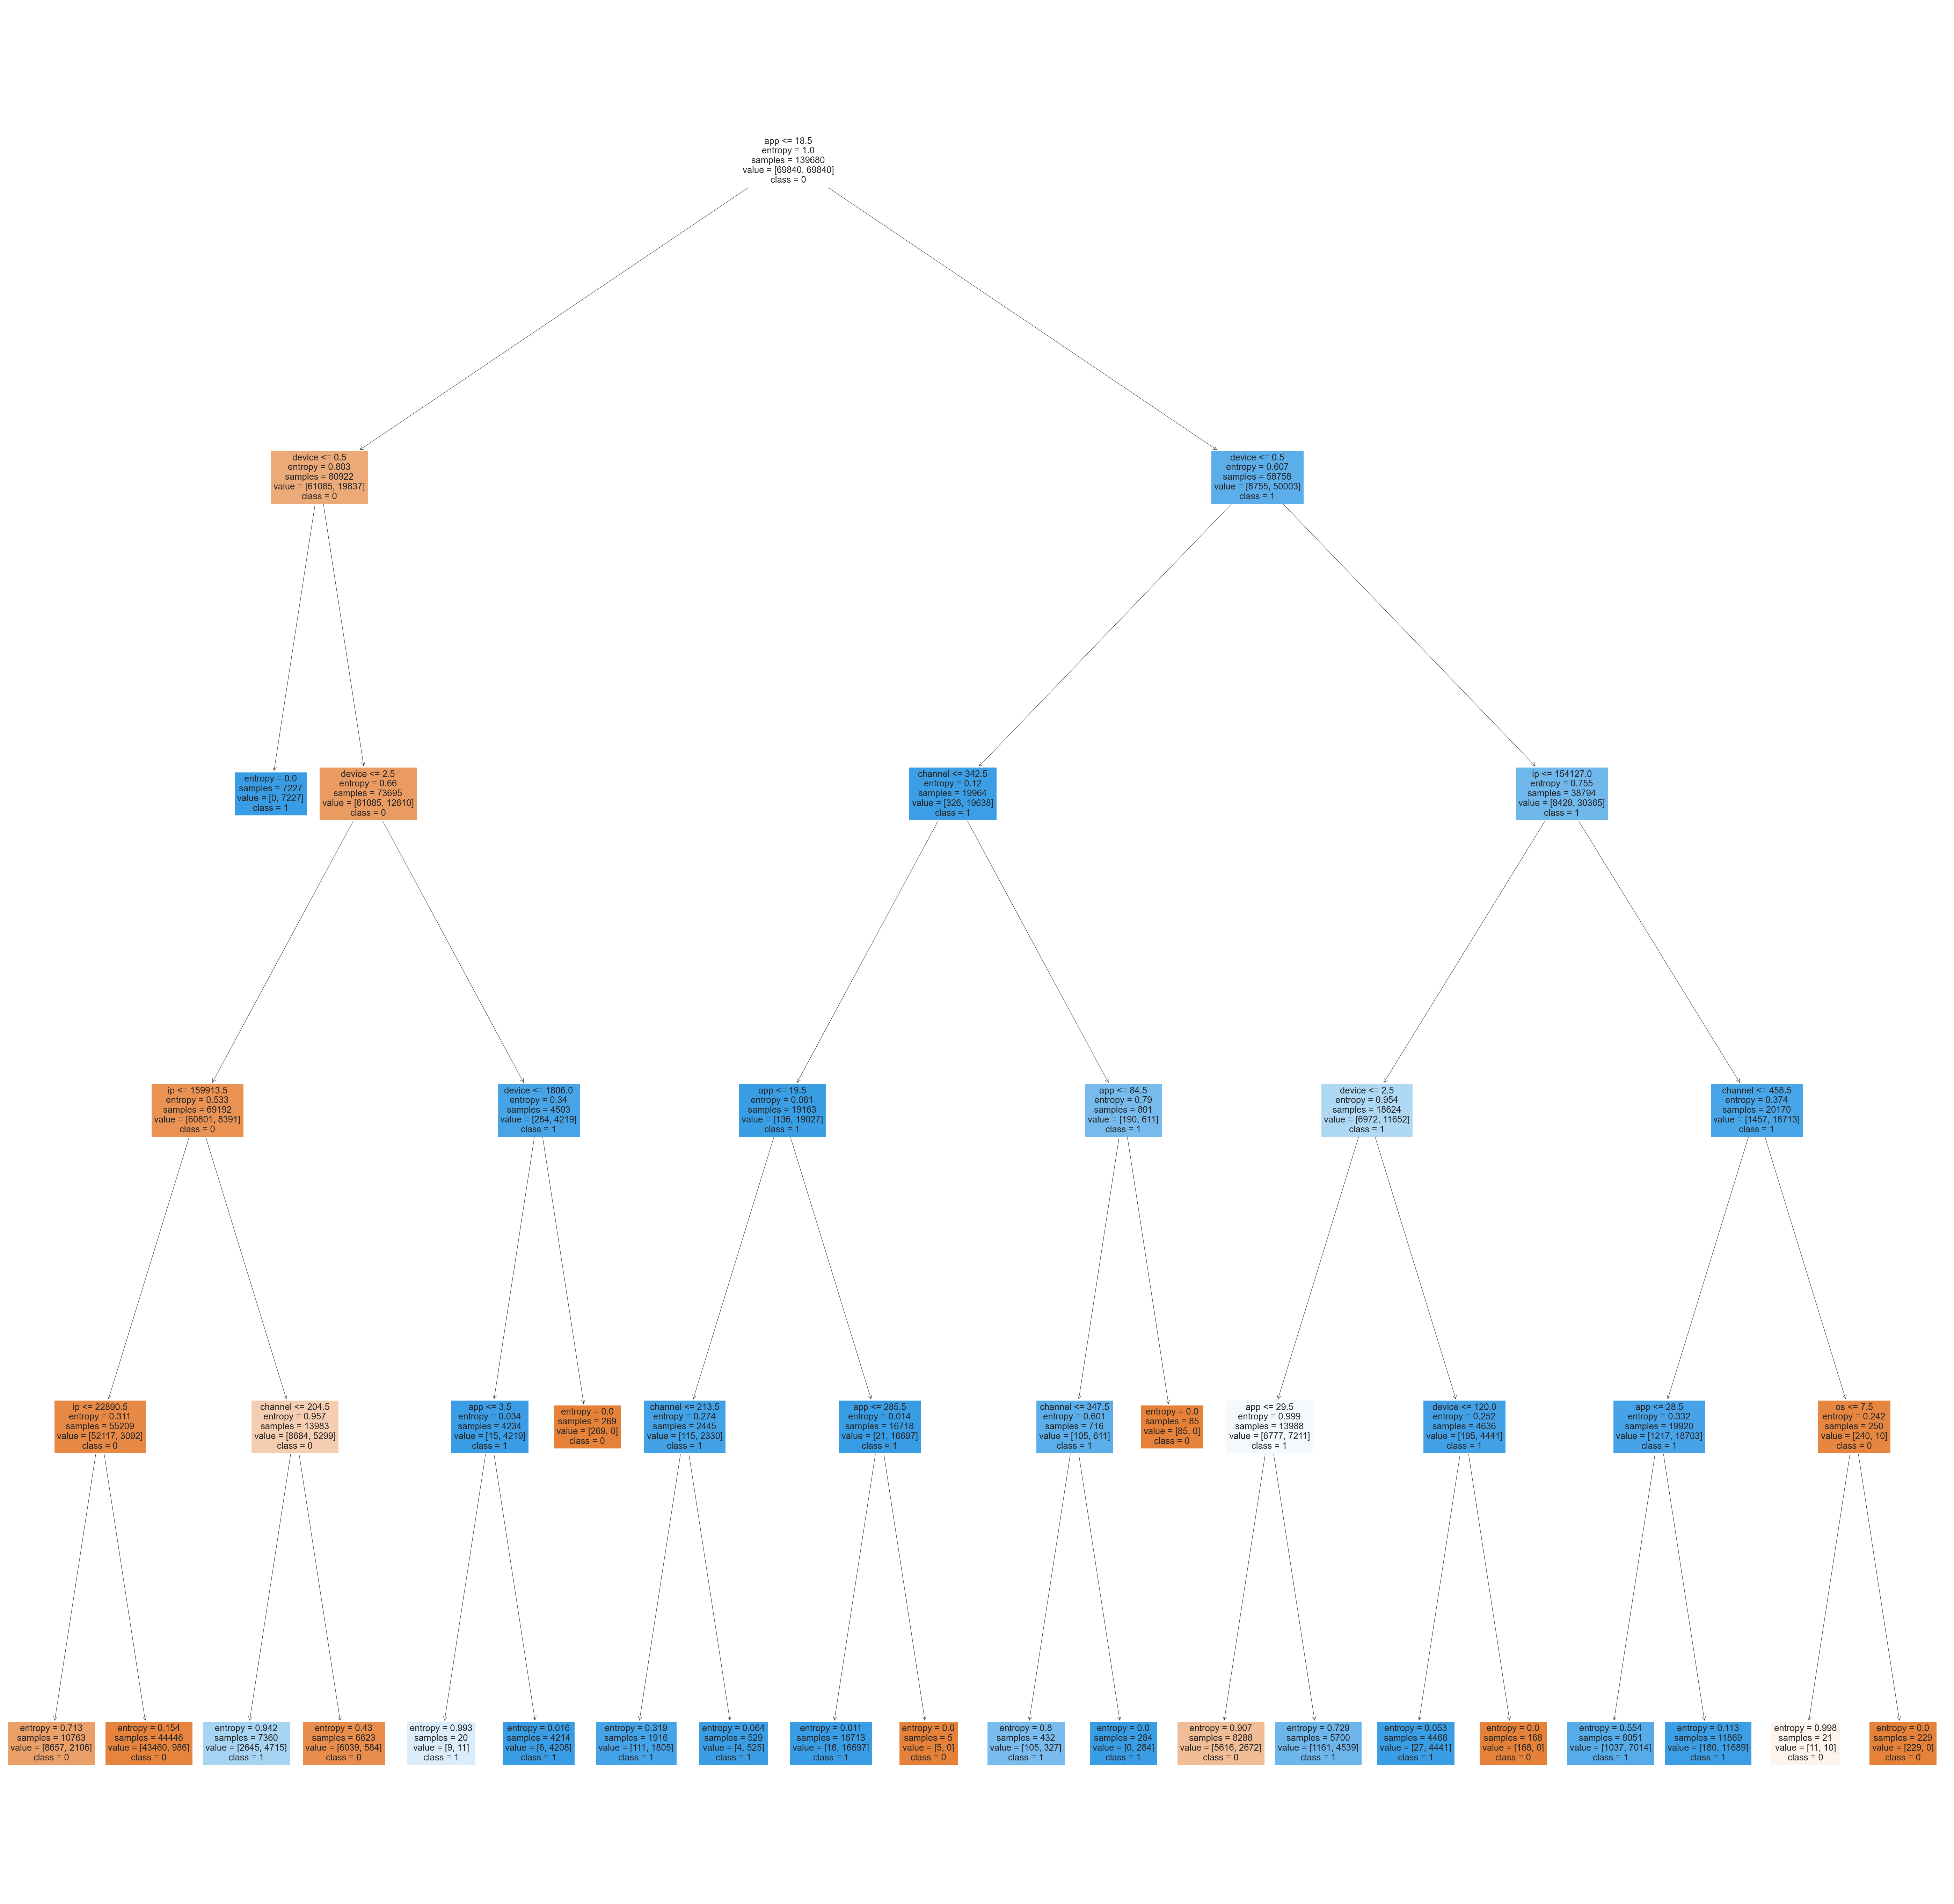

In [60]:
fig = plt.figure(figsize=(100,100))
features = ['ip','app','device', 'os', 'channel']
_ = tree.plot_tree(dct, 
                   feature_names=features,  
                   class_names=['0','1'],
                   filled=True)

### RNN Neural Network

In [61]:
from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [62]:
from numpy import array, newaxis, expand_dims

In [63]:
X_train_new = array(X_train_res)[:, :,newaxis]

In [64]:
X_train_new.shape

(139680, 5, 1)

In [65]:
y_train_res.shape

(139680,)

In [66]:
X_test_new = array(X_test)[:, :,newaxis]

In [67]:
X_test_new.shape

(29997, 5, 1)

In [68]:
y_test.shape

(29997,)

In [69]:
model = models.Sequential()

In [70]:
model.add(LSTM((1),batch_input_shape=(None,5,1),return_sequences=True))
model.add(LSTM((1),return_sequences=False))

In [71]:
model.compile(optimizer='adam',
loss='mean_absolute_error',
metrics=['accuracy'])

In [72]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 5, 1)              12        
_________________________________________________________________
lstm_1 (LSTM)                (None, 1)                 12        
Total params: 24
Trainable params: 24
Non-trainable params: 0
_________________________________________________________________


In [73]:
history = model.fit(X_train_new,y_train_res,epochs=50,batch_size=512,validation_data=(X_test_new, y_test))

Epoch 1/50
273/273 [==============================] - 9s 15ms/step - loss: 0.4976 - accuracy: 0.5017 - val_loss: 0.0540 - val_accuracy: 0.9974
Epoch 2/50
273/273 [==============================] - 1s 5ms/step - loss: 0.4057 - accuracy: 0.5896 - val_loss: 0.2089 - val_accuracy: 0.9856
Epoch 3/50
273/273 [==============================] - 1s 4ms/step - loss: 0.3126 - accuracy: 0.7873 - val_loss: 0.1433 - val_accuracy: 0.9856
Epoch 4/50
273/273 [==============================] - 1s 4ms/step - loss: 0.2758 - accuracy: 0.7903 - val_loss: 0.0864 - val_accuracy: 0.9856
Epoch 5/50
273/273 [==============================] - 1s 4ms/step - loss: 0.2524 - accuracy: 0.7889 - val_loss: 0.0504 - val_accuracy: 0.9856
Epoch 6/50
273/273 [==============================] - 1s 4ms/step - loss: 0.2312 - accuracy: 0.7925 - val_loss: 0.0237 - val_accuracy: 0.9856
Epoch 7/50
273/273 [==============================] - 1s 4ms/step - loss: 0.2229 - accuracy: 0.7943 - val_loss: 0.0249 - val_accuracy: 0.9856
Epoch

In [74]:
results= model.predict(X_test_new)

In [75]:
results

array([[ 3.7070559e-04],
       [-4.4246193e-05],
       [-3.9725604e-05],
       ...,
       [ 3.7062442e-04],
       [-3.9725604e-05],
       [ 6.9752336e-04]], dtype=float32)

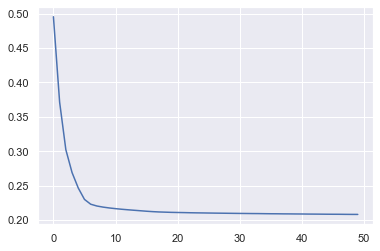

In [76]:
plt.plot(history.history['loss'])
plt.show()

In [77]:
from keras import models
from keras import layers
m = models.Sequential()
m.add(layers.Dense(16, activation='relu', batch_input_shape=(None,5,1)))
m.add(layers.Dense(1, activation='sigmoid'))
#m.add(layers.Dense(1, activation='sigmoid'))

In [78]:
m.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

In [79]:
from keras import optimizers
from keras import losses
from keras import metrics
m.compile(optimizer= optimizers.RMSprop(lr = 0.002),
loss=losses.binary_crossentropy,
metrics=[metrics.binary_accuracy])

In [113]:
h = m.fit(X_train_new,
y_train_res,
epochs=30,
batch_size=512,
validation_data=(X_test_new, y_test))

Epoch 1/30
273/273 [==============================] - 0s 2ms/step - loss: 2.2002 - binary_accuracy: 0.4874 - val_loss: 0.5362 - val_binary_accuracy: 0.4107
Epoch 2/30
273/273 [==============================] - 0s 1ms/step - loss: 2.2665 - binary_accuracy: 0.5071 - val_loss: 4.4984 - val_binary_accuracy: 0.0026
Epoch 3/30
273/273 [==============================] - 0s 2ms/step - loss: 2.2575 - binary_accuracy: 0.4613 - val_loss: 0.6839 - val_binary_accuracy: 0.3435
Epoch 4/30
273/273 [==============================] - 0s 2ms/step - loss: 2.2650 - binary_accuracy: 0.4858 - val_loss: 4.0475 - val_binary_accuracy: 0.2934
Epoch 5/30
273/273 [==============================] - 0s 2ms/step - loss: 2.2357 - binary_accuracy: 0.4854 - val_loss: 4.1171 - val_binary_accuracy: 0.0026
Epoch 6/30
273/273 [==============================] - 0s 2ms/step - loss: 2.2110 - binary_accuracy: 0.4756 - val_loss: 0.5794 - val_binary_accuracy: 0.4071
Epoch 7/30
273/273 [==============================] - 0s 1ms/ste

### Random forest with Feature importance 

In [81]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

In [82]:
model_rf = RandomForestClassifier()

In [83]:
model_rf.fit(X_train_res, y_train_res)

RandomForestClassifier()

In [84]:
y_pre = model_rf.predict(X_test)

In [85]:
print(classification_report(y_test, y_pre))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29920
           1       0.28      0.43      0.34        77

    accuracy                           1.00     29997
   macro avg       0.64      0.71      0.67     29997
weighted avg       1.00      1.00      1.00     29997



In [86]:
importance = model_rf.feature_importances_

Feature: 0, Score: 0.20633
Feature: 1, Score: 0.36454
Feature: 2, Score: 0.23559
Feature: 3, Score: 0.05423
Feature: 4, Score: 0.13931


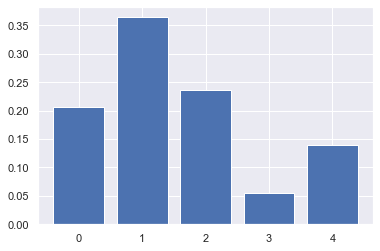

In [87]:
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature 1: ip <br>
Feature 2: app <br>
Feature 3: device <br>
Feature 4: os <br>
Feature 5: channel

In [88]:
x_new=df[['ip', 'app','device']]
y_new=df['is_attributed']

In [89]:
a_train, a_test, b_train, b_test = train_test_split(x_new, y_new, test_size = 0.3, random_state = 0)

In [90]:
sm = SMOTE(random_state = 3)
X_train_res2, y_train_res2 = sm.fit_resample(a_train, b_train)
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res2.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res2.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res2 == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res2 == 0)))

After OverSampling, the shape of train_X: (139680, 3)
After OverSampling, the shape of train_y: (139680,) 

After OverSampling, counts of label '1': 69840
After OverSampling, counts of label '0': 69840


In [91]:
model_rf2 = RandomForestClassifier()

In [92]:
model_rf2.fit(X_train_res2, y_train_res2)

RandomForestClassifier()

In [93]:
predictions = model_rf2.predict(a_test)
  
# print classification report
print(classification_report(b_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     29920
           1       0.04      0.40      0.07        77

    accuracy                           0.97     29997
   macro avg       0.52      0.69      0.53     29997
weighted avg       1.00      0.97      0.98     29997



In [94]:
X_train_res2.shape

(139680, 3)

In [95]:
X_train_new2 = array(X_train_res2)[:, :,newaxis]

In [96]:
X_train_new2.shape

(139680, 3, 1)

In [97]:
y_train_res2.shape

(139680,)

In [98]:
a_test_new = array(a_test)[:, :,newaxis]

In [99]:
a_test_new.shape

(29997, 3, 1)

In [100]:
b_test.shape

(29997,)

In [101]:
new_model = models.Sequential()

In [102]:
new_model.add(LSTM((1),batch_input_shape=(None,5,1),return_sequences=True))
new_model.add(LSTM((1),return_sequences=False))

In [103]:
new_model.compile(optimizer='adam',
loss='mean_absolute_error',
metrics=['accuracy'])

In [104]:
new_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 5, 1)              12        
_________________________________________________________________
lstm_3 (LSTM)                (None, 1)                 12        
Total params: 24
Trainable params: 24
Non-trainable params: 0
_________________________________________________________________


In [105]:
new_history = new_model.fit(X_train_new2,y_train_res2,epochs=30,batch_size=512,validation_data=(a_test_new, b_test))

Epoch 1/30
273/273 [==============================] - 5s 6ms/step - loss: 0.5006 - accuracy: 0.4999 - val_loss: 0.2418 - val_accuracy: 0.9974
Epoch 2/30
273/273 [==============================] - 1s 3ms/step - loss: 0.4920 - accuracy: 0.4986 - val_loss: 0.2530 - val_accuracy: 0.9974
Epoch 3/30
273/273 [==============================] - 1s 3ms/step - loss: 0.4662 - accuracy: 0.5118 - val_loss: 0.2863 - val_accuracy: 0.9925
Epoch 4/30
273/273 [==============================] - 1s 3ms/step - loss: 0.4328 - accuracy: 0.6912 - val_loss: 0.2634 - val_accuracy: 0.9925
Epoch 5/30
273/273 [==============================] - 1s 3ms/step - loss: 0.4042 - accuracy: 0.6905 - val_loss: 0.2224 - val_accuracy: 0.9925
Epoch 6/30
273/273 [==============================] - 1s 3ms/step - loss: 0.3845 - accuracy: 0.6893 - val_loss: 0.1832 - val_accuracy: 0.9925
Epoch 7/30
273/273 [==============================] - 1s 3ms/step - loss: 0.3710 - accuracy: 0.6880 - val_loss: 0.1511 - val_accuracy: 0.9925
Epoch 

In [106]:
re= new_model.predict(a_test_new)

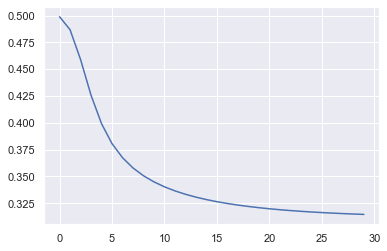

In [107]:
plt.plot(new_history.history['loss'])
plt.show()

In [108]:
mod = models.Sequential()
mod.add(layers.Dense(16, activation='relu', batch_input_shape=(None,5,1)))
mod.add(layers.Dense(1, activation='relu'))
#mod.add(layers.Dense(1, activation='sigmoid'))

In [109]:
mod.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

In [110]:
m.compile(optimizer= optimizers.RMSprop(lr = 0.002),
loss=losses.binary_crossentropy,
metrics=[metrics.binary_accuracy])

In [111]:
hist = mod.fit(X_train_new2,
y_train_res2,
epochs=20,
batch_size=512,
validation_data=(a_test_new, b_test))

Epoch 1/20
273/273 [==============================] - 1s 2ms/step - loss: 7.7365 - accuracy: 0.4984 - val_loss: 0.0396 - val_accuracy: 0.9974
Epoch 2/20
273/273 [==============================] - 0s 1ms/step - loss: 7.6952 - accuracy: 0.5011 - val_loss: 0.0396 - val_accuracy: 0.9974
Epoch 3/20
273/273 [==============================] - 0s 1ms/step - loss: 7.7173 - accuracy: 0.4997 - val_loss: 0.0396 - val_accuracy: 0.9974
Epoch 4/20
273/273 [==============================] - 0s 1ms/step - loss: 7.7367 - accuracy: 0.4984 - val_loss: 0.0396 - val_accuracy: 0.9974
Epoch 5/20
273/273 [==============================] - 0s 1ms/step - loss: 7.7557 - accuracy: 0.4972 - val_loss: 0.0396 - val_accuracy: 0.9974
Epoch 6/20
273/273 [==============================] - 0s 1ms/step - loss: 7.7191 - accuracy: 0.4996 - val_loss: 0.0396 - val_accuracy: 0.9974
Epoch 7/20
273/273 [==============================] - 0s 1ms/step - loss: 7.7071 - accuracy: 0.5003 - val_loss: 0.0396 - val_accuracy: 0.9974
Epoch 